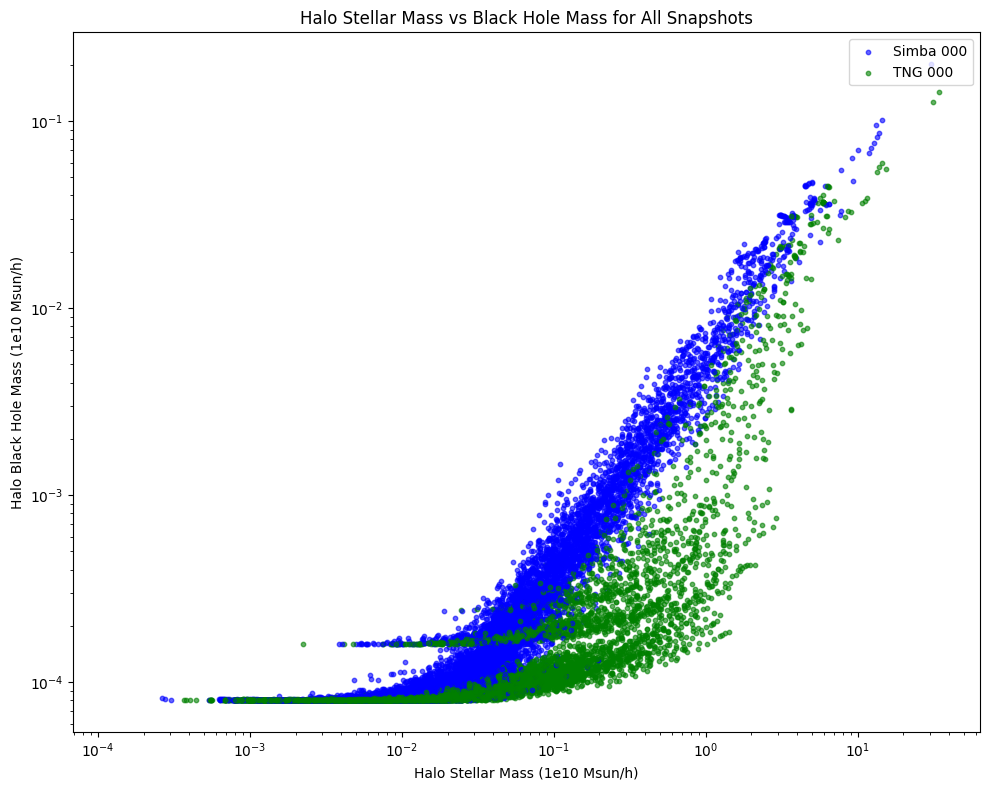

In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def load_fof_halo_data(file_path):
    with h5py.File(file_path, 'r') as f:
        stellar_mass = f['Group/GroupMassType'][:, 4]  
        bh_mass = f['Group/GroupBHMass'][:]  
    return stellar_mass, bh_mass

snapshots = range(0, 16, 1)  

plt.figure(figsize=(10, 8))

for snapshot in snapshots:
    snapshot_str = f"{snapshot:03d}"

    file_simba = f"./SimbaTNG-production/simba_test_eos/fof_subhalo_tab_{snapshot_str}.hdf5"
    file_tng = f"./SimbaTNG-production/TNG_fid_fixed/fof_subhalo_tab_{snapshot_str}.hdf5"

    try:
        stellar_simba, bh_simba = load_fof_halo_data(file_simba)
        stellar_tng, bh_tng = load_fof_halo_data(file_tng)

        plt.scatter(stellar_simba, bh_simba, color='blue', alpha=0.6, s=10, label=f"Simba {snapshot_str}" if snapshot == 0 else "")

        plt.scatter(stellar_tng, bh_tng, color='green', alpha=0.6, s=10, label=f"TNG {snapshot_str}" if snapshot == 0 else "")

    except (OSError, KeyError) as e:
        print(f"Error loading snapshot {snapshot_str}: {e}")
        continue

plt.xlabel("Halo Stellar Mass (1e10 Msun/h)")
plt.ylabel("Halo Black Hole Mass (1e10 Msun/h)")
plt.title("Halo Stellar Mass vs Black Hole Mass for All Snapshots")
plt.xscale("log")
plt.yscale("log")

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
# large diffrence, good to note 

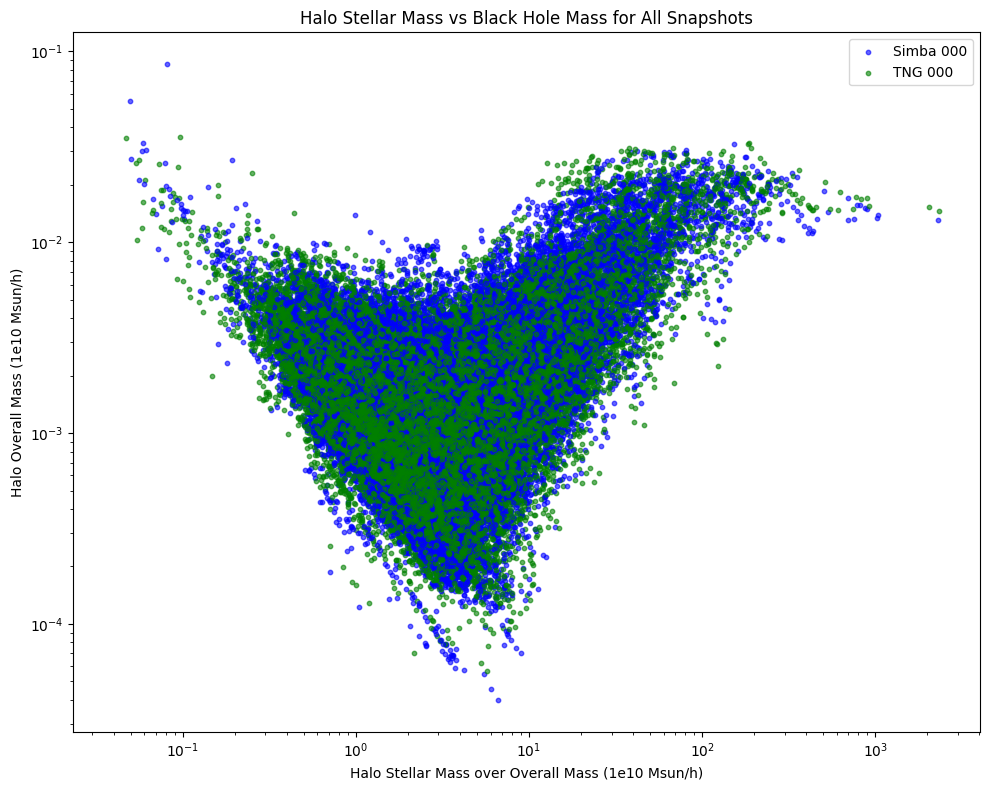

In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def load_fof_halo_data(file_path):
    with h5py.File(file_path, 'r') as f:
        stellar_mass = f['Group/GroupMassType'][:, 4]  
        overall_mass = f['Group/GroupMass'][:]  
    return stellar_mass, overall_mass

snapshots = range(0, 16, 1)  

plt.figure(figsize=(10, 8))

for snapshot in snapshots:
    snapshot_str = f"{snapshot:03d}"

    file_simba = f"./SimbaTNG-production/simba_test_eos/fof_subhalo_tab_{snapshot_str}.hdf5"
    file_tng = f"./SimbaTNG-production/TNG_fid_fixed/fof_subhalo_tab_{snapshot_str}.hdf5"

    try:
        stellar_simba, overall_simba = load_fof_halo_data(file_simba)
        stellar_tng, overall_tng = load_fof_halo_data(file_tng)

        plt.scatter(overall_simba, stellar_simba/overall_simba, color='blue', alpha=0.6, s=10, label=f"Simba {snapshot_str}" if snapshot == 0 else "")

        plt.scatter(overall_tng, stellar_tng/overall_tng, color='green', alpha=0.6, s=10, label=f"TNG {snapshot_str}" if snapshot == 0 else "")

    except (OSError, KeyError) as e:
        print(f"Error loading snapshot {snapshot_str}: {e}")
        continue

plt.xlabel("Halo Stellar Mass over Overall Mass (1e10 Msun/h)")
plt.ylabel("Halo Overall Mass (1e10 Msun/h)")
plt.title("Halo Stellar Mass vs Black Hole Mass for All Snapshots")
plt.xscale("log")
plt.yscale("log")

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
# large diffrence, good to note
#find the mean, 